In [8]:
import pandas as pd 
import os
from keras.models import Sequential, load_model
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D,concatenate,Concatenate,multiply, LocallyConnected2D, Lambda)
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras import backend as K
import keras
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB7
import skimage.io
from skimage.transform import resize

from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy, categorical_crossentropy
#from keras.applications.resnet50 import preprocess_input
from keras.applications.densenet import DenseNet121,DenseNet169,preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score

import keras.callbacks as callbacks
from keras.callbacks import Callback
get_ipython().run_line_magic('config', 'InlineBackend.figure_format="svg"')
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings("ignore")
SIZE = 224
NUM_CLASSES = 2
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
%matplotlib inline


In [3]:
!pip install opencv-python


     |████████████████████████████████| 60.9 MB 2.8 MB/s eta 0:00:013   |███▋                            | 6.9 MB 393 kB/s eta 0:02:18     |██████▊                         | 12.7 MB 15.5 MB/s eta 0:00:04


In [9]:
!pip install scikit-learn
!pip3 install -U scikit-learn scipy matplotlib

  Using cached https://files.pythonhosted.org/packages/31/9f/042db462417451e81035c3d43b722e88450c628a33dfda69777a801b0d40/scikit_learn-0.20.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/24/40/11b12af7f322c1e20446c037c47344d89bab4922b8859419d82cf56d796d/scipy-1.2.3-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
    100% |████████████████████████████████| 20.0MB 50kB/s eta 0:00:01
    100% |████████████████████████████████| 25.9MB 46kB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 88kB/s eta 0:00:01
    100% |████████████████████████████████| 307kB 227kB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 75kB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 159kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


def get_num_input():
    df = pd.read_csv('Ad.csv')
    df = df.drop(['filename'],axis=1)
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_num, Y = get_num_input()
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split( X_num, Y, test_size=0.2,random_state=42)
#Scaling the Feature columns
#scaler = StandardScaler()
#X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float)

#def get_img_input():
    #df = pd.read_csv('/DATA/akanksha_2021cs39/visualdata.csv')
    #X_img = np.zeros((len(df), 224, 224)) # change as per image size
    #Y = list()
    #for i, row in df.iterrows():
        #X_img[i] = np.array(Image.open(row['X_img']))
        #Y.append(row['class'])

    #return (X_img, Y)
    
#X_img, Y_img = get_img_input() # use one of the Ys
# X feature normalization, convert Y to one-hot representation

In [ ]:
#df = pd.read_csv('/DATA/akanksha_2021cs39/fakeAV_audio.csv')
#df.shape

In [ ]:
#df = df.drop(21253)

In [ ]:
#df.shape

In [ ]:
#df.tail()

In [ ]:
#df.to_csv('Ad.csv', index=False)

In [ ]:
#df2 = pd.read_csv('/DATA/akanksha_2021cs39/fakeAV_visual.csv')
#df2.shape

In [ ]:
#df2.head()

In [ ]:
#df2 = df2.drop([0 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
#df2.shape

In [ ]:
#df2.to_csv('Vd.csv', header=None, index=False)

In [12]:
def get_img_input():
    df = pd.read_csv('Vd.csv')
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_img, Y_img = get_img_input()
encoder = LabelEncoder()
Y_img = encoder.fit_transform(Y_img)
X_img_train, X_img_test, y_img_train, y_img_test = train_test_split( X_img, Y_img, test_size=0.2,random_state=42)

In [13]:
y_train=y_audio_train # both audio and video samples are synchronized so both have same levels that is why 
                                                     #initialized here with one (audio or video) label.
y_test=y_audio_test

In [14]:
print(X_audio_train.shape)
print(X_img_train.shape)
print(X_audio_test.shape)
print(X_img_test.shape)
print(y_audio_train.shape)
print(y_img_train.shape)
print(y_audio_test.shape)
print(y_img_test.shape)

(17001, 133)
(17001, 50176)
(4251, 133)
(4251, 50176)
(17001,)
(17001,)
(4251,)
(4251,)


In [15]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np
from keras import regularizers
from keras.layers import Dropout 
def compile_model():
    img_input = Input(shape=(50176,)) 
    ## branch 1 with image input
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(img_input)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    out_a = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    
    #x = MaxPooling2D((2, 2))(x)
    #x = Flatten()(x)
    #out_a = Dense(64)(x)

    num_input = Input(shape=(133,))        ## branch 2 with numerical input
    x1 = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(num_input)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    out_b = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)

    concatenated = concatenate([out_a, out_b])    ## concatenate the two branches
    out = Dense(1, activation='sigmoid')(concatenated)
    model = Model([img_input, num_input], out)
    adam = Adam(lr=0.001, decay=1e-5)
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model
    
    
    

### Just for sanity check

#print(model.predict(X))

In [16]:
model = compile_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50176)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 133)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 1024)         51381248    ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 1024)         137216      ['input_2[0][0]']                
                                                                                              

2022-07-05 21:12:25.601018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/arman/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-05 21:12:25.601047: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-05 21:12:25.601069: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arman): /proc/driver/nvidia/version does not exist
2022-07-05 21:12:25.601439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dense_3 (Dense)                (None, 128)          32896       ['dropout_2[0][0]']              
                                                                                                  
 dense_9 (Dense)                (None, 128)          32896       ['dropout_7[0][0]']              
                                                                                                  
 dropout_3 (Dropout)            (None, 128)          0           ['dense_3[0][0]']                
                                                                                                  
 dropout_8 (Dropout)            (None, 128)          0           ['dense_9[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           8256        ['dropout_3[0][0]']              
                                                                                                  
 dense_10 

In [17]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history=model.fit([X_img_train, X_audio_train], y_train, batch_size=256, epochs=1000,
                            validation_data=([X_img_test, X_audio_test], y_test), callbacks=[es])

Epoch 1/1000
67/67 [==============================] - 15s 205ms/step - loss: 203.9039 - accuracy: 0.8860 - val_loss: 53.9685 - val_accuracy: 0.9475
Epoch 2/1000
67/67 [==============================] - 13s 195ms/step - loss: 55.3476 - accuracy: 0.8914 - val_loss: 38.0840 - val_accuracy: 0.3331
Epoch 3/1000
67/67 [==============================] - 13s 194ms/step - loss: 39.2560 - accuracy: 0.8918 - val_loss: 31.9311 - val_accuracy: 0.8224
Epoch 4/1000
67/67 [==============================] - 13s 194ms/step - loss: 31.1999 - accuracy: 0.8844 - val_loss: 27.5281 - val_accuracy: 0.9475
Epoch 5/1000
67/67 [==============================] - 13s 194ms/step - loss: 26.4094 - accuracy: 0.8973 - val_loss: 24.2132 - val_accuracy: 0.9475
Epoch 6/1000
67/67 [==============================] - 13s 194ms/step - loss: 23.1033 - accuracy: 0.9318 - val_loss: 21.5594 - val_accuracy: 0.9475
Epoch 7/1000
67/67 [==============================] - 13s 194ms/step - loss: 20.5697 - accuracy: 0.9401 - val_loss: 1

In [30]:
print(history.history.keys())
df=pd.DataFrame(history.history)
df.to_csv('fakeavceleb_MAV_net.csv')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="lower right")
    plt.savefig('fakeav_combined_acc.eps', format='eps')
    plt.show()

In [19]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig('fakeav_combined_loss.eps', format='eps')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


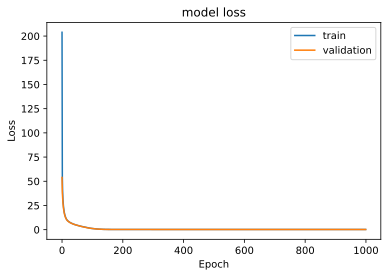

In [20]:
plot_loss(history)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


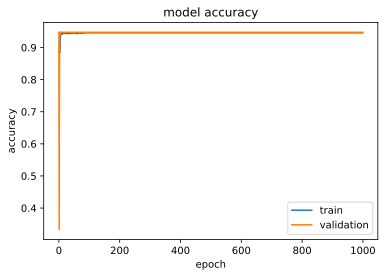

In [21]:
plot_hist(history)

In [22]:
# evaluate the model
train_loss, train_acc = model.evaluate([X_img_train, X_audio_train], y_train, verbose=0)
test_loss, test_acc = model.evaluate([X_img_test, X_audio_test], y_test, verbose=0)
print('Train_Loss: %.3f, Train_Acc: %.3f' % (train_loss, train_acc))
print('Test_Loss: %.3f, Test_Acc: %.3f' % (test_loss, test_acc))

Train_Loss: 0.195, Train_Acc: 0.946
Test_Loss: 0.193, Test_Acc: 0.948


In [23]:
pred = model.predict([X_img_test, X_audio_test])

133/133 [==============================] - 2s 16ms/step


In [24]:
y_pred = (model.predict([X_img_test, X_audio_test]) > 0.5)*1    #.astype("int32")

133/133 [==============================] - 2s 15ms/step


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

score: 0.9475417548812044
Precision: 0.0
Recall: 0.0
F1_score: 0.0


In [26]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[4028    0]
 [ 223    0]]


In [27]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, labels=[0,1])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4028
           1       0.00      0.00      0.00       223

    accuracy                           0.95      4251
   macro avg       0.47      0.50      0.49      4251
weighted avg       0.90      0.95      0.92      4251



In [28]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 4028 0 223 0
